In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
from scipy.stats import ttest_ind


# linear modelling
import statsmodels.api as sm
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression


# Import API key. Renamed mine
#from api_keys_Yvonne import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
#from citipy import citipy

# Our Clean Netflix data (CSV)
output_data_file = "NetflixDF4.csv"

# Read the CSV
netflix_df = pd.read_csv(output_data_file)

# Display the data table for preview
netflix_df.head()

,show_id,title,release_year,type,rating,country,genre,duration
0,s1,Dick Johnson Is Dead,2020,Movie,PG-13,United States,Documentaries,90.0
1,s8,Sankofa,1993,Movie,R,United States,Dramas,125.0
2,s10,The Starling,2021,Movie,PG-13,United States,Comedies,104.0
3,s25,Jeans,1998,Movie,PG-13,India,Comedies,166.0
4,s28,Grown Ups,2010,Movie,PG-13,United States,Comedies,103.0


In [2]:
netflix_df.rating.value_counts()

R        1604
PG-13    1207
PG        614
G          86
NR         47
Name: rating, dtype: int64

In [3]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3558 entries, 0 to 3557
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       3558 non-null   object 
 1   title         3558 non-null   object 
 2   release_year  3558 non-null   int64  
 3   type          3558 non-null   object 
 4   rating        3558 non-null   object 
 5   country       3558 non-null   object 
 6   genre         3558 non-null   object 
 7   duration      3558 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 222.5+ KB


In [4]:
# i am doing 3 different models based on country
# United States 
genre = "Dramas"
india_df = netflix_df.loc[(netflix_df['country'] == 'India') & (netflix_df["genre"]== genre)]
india_df.head()

,show_id,title,release_year,type,rating,country,genre,duration
18,s115,Anjaam,1994,Movie,PG-13,India,Dramas,143.0
22,s119,Gurgaon,2017,Movie,PG-13,India,Dramas,106.0
24,s127,Shikara,2020,Movie,PG-13,India,Dramas,115.0
62,s191,Thimmarusu,2021,Movie,PG-13,India,Dramas,125.0
68,s202,Kucch To Hai,2003,Movie,PG-13,India,Dramas,136.0


In [5]:
#using hmk 5
corrs= india_df.corr()
corrs

,release_year,duration
release_year,1.000000,-0.402367
duration,-0.402367,1.000000


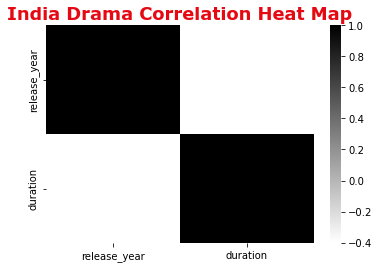

In [6]:
sns.heatmap(corrs, cmap = "binary")
plt.title("India Drama Correlation Heat Map",fontsize = 18, fontweight = "bold",fontname="Verdana", color = "#E50914")
plt.savefig("FIG 1.India Drama Correlation Heat Map.png")
plt.show()

In [7]:
# ValueError: '#0A0903' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'
#https://gallantlab.github.io/pycortex/colormaps.html

In [8]:
corr=(st.pearsonr(india_df['release_year'],india_df['duration']))
corr
print(f"The correlation between release year and duration is {corr}")

The correlation between release year and duration is (-0.40236714353703007, 3.7331169565147347e-17)


The r-squared is: 0.16189931819814896


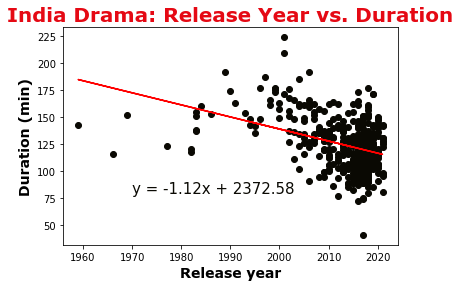

In [9]:
#linear regression model like in class activity day 3 act 9

x_values = india_df['release_year']
y_values = india_df['duration']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color="#0A0903",marker="o")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1970,80),fontsize=15,color="#0A0903")
plt.xlabel('Release year',fontsize = 14,fontweight = "bold",fontname="Verdana")
plt.ylabel('Duration (min)',fontsize = 14,fontweight = "bold",fontname="Verdana")
plt.title('India Drama: Release Year vs. Duration',fontsize = 20, fontweight = "bold",fontname="Verdana", color = "#E50914")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("FIG 2.India Drama Release Year vs. Duration.png")
plt.show()

In [10]:
feature = india_df[["release_year"]]
target = india_df["duration"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

C:\Users\yvonne\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     77.66
Date:                Fri, 11 Feb 2022   Prob (F-statistic):           3.73e-17
Time:                        17:06:06   Log-Likelihood:                -1824.2
No. Observations:                 404   AIC:                             3652.
Df Residuals:                     402   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2372.5785    255.052      9.302      0.000    1871.176    2873.981
release_year    -1.1168      0.127     -8.812      0.000      -1.366      -0.868
==============================================================================
Omnibus:                        6.709   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                7.533
Skew:                           0.203   Prob(JB):                       0.0231
Kurtosis:                       3.532   Cond. No.                     4.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
# both my r2 are the same and my coeficcients

In [12]:
#SCIKIT_Learn
reg = LinearRegression()
reg.fit(np.array(feature), np.array(target))
print(reg.coef_)
print(reg.intercept_)

[-1.11675923]
2372.5784974675885


In [13]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [14]:
actual = india_df["duration"]
predictions = reg.predict(india_df["release_year"].values.reshape(-1, 1))

r2 = r2_score(actual, predictions)
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {np.sqrt(mse)}")
print(f"MAE: {mae}")

R2: 0.16189931819814873
MSE: 489.1394373195355
RMSE: 22.11649694955183
MAE: 17.337337503837002


#booth
#5.7% of the variance of duration is explained by releas year

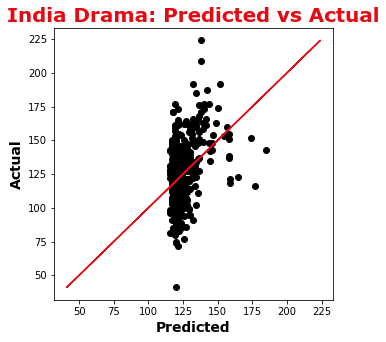

In [15]:
#questions about this one
plt.figure(figsize=(5,5))

plt.scatter(predictions, actual, c="black")
plt.plot(actual, actual,color="#E50914", )

plt.xlabel("Predicted",fontsize = 14,fontweight = "bold",fontname="Verdana")
plt.ylabel("Actual",fontsize = 14,fontweight = "bold",fontname="Verdana")
plt.title("India Drama: Predicted vs Actual", fontsize = 20, fontweight = "bold",fontname="Verdana", color = "#E50914")
plt.savefig("FIG 3.India Drama Predicted vs Actual.png")
plt.show()

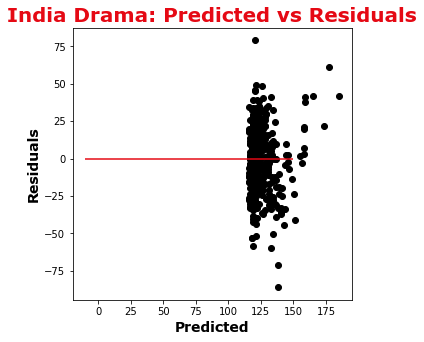

In [16]:
residuals = predictions - actual

plt.figure(figsize=(5,5))

plt.scatter(predictions, residuals,c="black")
plt.hlines(0, -10, 150,color="#E50914")

plt.xlabel("Predicted",fontsize = 14,fontweight = "bold",fontname="Verdana")
plt.ylabel("Residuals",fontsize = 14,fontweight = "bold",fontname="Verdana")
plt.title("India Drama: Predicted vs Residuals", fontsize = 20, fontweight = "bold",fontname="Verdana", color = "#E50914")
plt.savefig("FIG 4.India Drama Predicted vs Actual.png")
plt.show()

In [17]:
india_df.describe()

,release_year,duration
count,404.000000,404.000000
mean,2012.576733,125.014851
std,8.715040,24.188359
min,1959.000000,41.000000
25%,2010.000000,107.000000
50%,2016.000000,124.000000
75%,2018.000000,139.000000
max,2021.000000,224.000000


# HORROR MOVIES


In [18]:
# i am doing 3 different models based on country
# United States 
genre = "Horror Movies"
india_df = netflix_df.loc[(netflix_df['country'] == 'India') & (netflix_df["genre"]== genre)]
india_df.head()

,show_id,title,release_year,type,rating,country,genre,duration
77,s211,Ragini MMS,2011,Movie,R,India,Horror Movies,93.0
78,s212,Ragini MMS 2,2014,Movie,R,India,Horror Movies,113.0
529,s1654,Andhakaaram,2020,Movie,PG-13,India,Horror Movies,171.0
573,s1778,Kaali Khuhi,2020,Movie,PG-13,India,Horror Movies,91.0
763,s2343,Bulbbul,2020,Movie,R,India,Horror Movies,94.0


In [19]:
#using hmk 5
corrs= india_df.corr()
corrs

,release_year,duration
release_year,1.000000,0.121613
duration,0.121613,1.000000


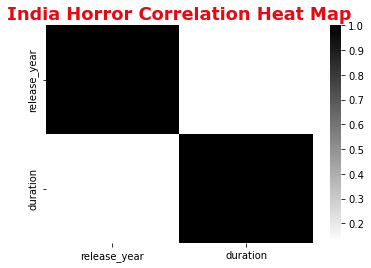

In [20]:
sns.heatmap(corrs, cmap = "binary")
plt.title("India Horror Correlation Heat Map",fontsize = 18, fontweight = "bold",fontname="Verdana", color = "#E50914")
plt.savefig("FIG 1.India Horror Correlation Heat Map.png")
plt.show()

In [21]:
# ValueError: '#0A0903' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'
#https://gallantlab.github.io/pycortex/colormaps.html

In [22]:
corr=(st.pearsonr(india_df['release_year'],india_df['duration']))
corr
print(f"The correlation between release year and duration is {corr}")

The correlation between release year and duration is (0.12161323336356376, 0.5220540456544737)


The r-squared is: 0.014789778529140608


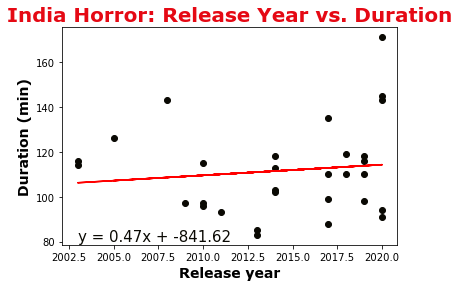

In [23]:
#linear regression model like in class activity day 3 act 9

x_values = india_df['release_year']
y_values = india_df['duration']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color="#0A0903",marker="o")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2003,80),fontsize=15,color="#0A0903")
plt.xlabel('Release year',fontsize = 14,fontweight = "bold",fontname="Verdana")
plt.ylabel('Duration (min)',fontsize = 14,fontweight = "bold",fontname="Verdana")
plt.title('India Horror: Release Year vs. Duration',fontsize = 20, fontweight = "bold",fontname="Verdana", color = "#E50914")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("FIG 2.India Horror Release Year vs. Duration.png")
plt.show()

In [24]:
feature = india_df[["release_year"]]
target = india_df["duration"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

C:\Users\yvonne\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                    0.4203
Date:                Fri, 11 Feb 2022   Prob (F-statistic):              0.522
Time:                        17:06:08   Log-Likelihood:                -132.11
No. Observations:                  30   AIC:                             268.2
Df Residuals:                      28   BIC:                             271.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -841.6172   1470.273     -0.572      0.572   -3853.334    2170.100
release_year     0.4732      0.730      0.648      0.522      -1.022       1.968
==============================================================================
Omnibus:                        5.481   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.065   Jarque-Bera (JB):                4.012
Skew:                           0.865   Prob(JB):                        0.135
Kurtosis:                       3.462   Cond. No.                     7.92e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.92e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
# both my r2 are the same and my coeficcients

In [26]:
#SCIKIT_Learn
reg = LinearRegression()
reg.fit(np.array(feature), np.array(target))
print(reg.coef_)
print(reg.intercept_)

[0.47320937]
-841.6171798890255


In [27]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [28]:
actual = india_df["duration"]
predictions = reg.predict(india_df["release_year"].values.reshape(-1, 1))

r2 = r2_score(actual, predictions)
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {np.sqrt(mse)}")
print(f"MAE: {mae}")

R2: 0.014789778529140207
MSE: 391.2992276956529
RMSE: 19.781284783745797
MAE: 15.657893176331065


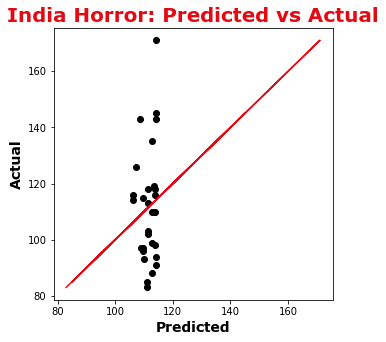

In [29]:
#questions about this one
plt.figure(figsize=(5,5))

plt.scatter(predictions, actual, c="black")
plt.plot(actual, actual,color="#E50914", )

plt.xlabel("Predicted",fontsize = 14,fontweight = "bold",fontname="Verdana")
plt.ylabel("Actual",fontsize = 14,fontweight = "bold",fontname="Verdana")
plt.title("India Horror: Predicted vs Actual", fontsize = 20, fontweight = "bold",fontname="Verdana", color = "#E50914")
plt.savefig("FIG 3.India Horror Predicted vs Actual.png")
plt.show()

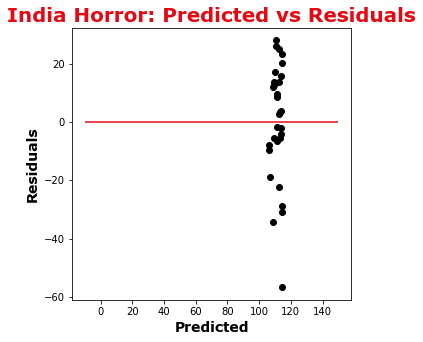

In [30]:
residuals = predictions - actual

plt.figure(figsize=(5,5))

plt.scatter(predictions, residuals,c="black")
plt.hlines(0, -10, 150,color="#E50914")

plt.xlabel("Predicted",fontsize = 14,fontweight = "bold",fontname="Verdana")
plt.ylabel("Residuals",fontsize = 14,fontweight = "bold",fontname="Verdana")
plt.title("India Horror: Predicted vs Residuals", fontsize = 20, fontweight = "bold",fontname="Verdana", color = "#E50914")
plt.savefig("FIG 4.India Horror Predicted vs Actual.png")
plt.show()

# Action & Adventure

In [31]:
# i am doing 3 different models based on country
# United States 
genre = "Action & Adventure"
india_df = netflix_df.loc[(netflix_df['country'] == 'India') & (netflix_df["genre"]== genre)]
india_df.head()

,show_id,title,release_year,type,rating,country,genre,duration
16,s106,Angamaly Diaries,2017,Movie,PG-13,India,Action & Adventure,128.0
64,s193,C Kkompany,2008,Movie,PG-13,India,Action & Adventure,127.0
67,s201,Krishna Cottage,2004,Movie,PG-13,India,Action & Adventure,124.0
74,s208,Mission Istaanbul: Darr Ke Aagey Jeet Hai,2008,Movie,PG-13,India,Action & Adventure,119.0
79,s216,Shootout at Lokhandwala,2007,Movie,R,India,Action & Adventure,116.0


In [32]:
#using hmk 5
corrs= india_df.corr()
corrs

,release_year,duration
release_year,1.000000,-0.352122
duration,-0.352122,1.000000


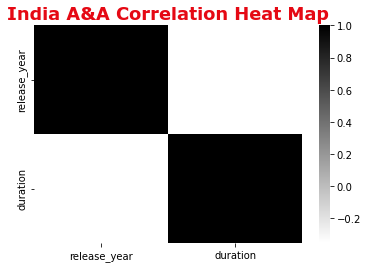

In [33]:
sns.heatmap(corrs, cmap = "binary")
plt.title("India A&A Correlation Heat Map",fontsize = 18, fontweight = "bold",fontname="Verdana", color = "#E50914")
plt.savefig("FIG 1.India A&A Correlation Heat Map.png")
plt.show()

In [34]:
# ValueError: '#0A0903' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'
#https://gallantlab.github.io/pycortex/colormaps.html

In [35]:
corr=(st.pearsonr(india_df['release_year'],india_df['duration']))
corr
print(f"The correlation between release year and duration is {corr}")

The correlation between release year and duration is (-0.3521220799251853, 3.983951031647036e-05)


The r-squared is: 0.12398995917083862


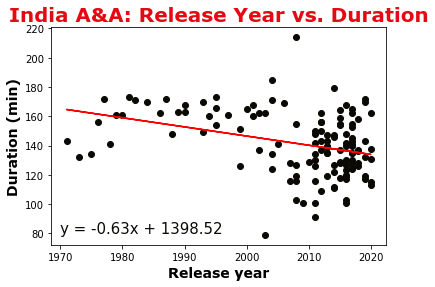

In [36]:
#linear regression model like in class activity day 3 act 9

x_values = india_df['release_year']
y_values = india_df['duration']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color="#0A0903",marker="o")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1970,80),fontsize=15,color="#0A0903")
plt.xlabel('Release year',fontsize = 14,fontweight = "bold",fontname="Verdana")
plt.ylabel('Duration (min)',fontsize = 14,fontweight = "bold",fontname="Verdana")
plt.title('India A&A: Release Year vs. Duration',fontsize = 20, fontweight = "bold",fontname="Verdana", color = "#E50914")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("FIG 2.India A&A Release Year vs. Duration.png")
plt.show()

In [37]:
feature = india_df[["release_year"]]
target = india_df["duration"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

C:\Users\yvonne\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     18.12
Date:                Fri, 11 Feb 2022   Prob (F-statistic):           3.98e-05
Time:                        17:06:11   Log-Likelihood:                -575.30
No. Observations:                 130   AIC:                             1155.
Df Residuals:                     128   BIC:                             1160.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1398.5248    295.291      4.736      0.000     814.242    1982.808
release_year    -0.6260      0.147     -4.256      0.000      -0.917      -0.335
==============================================================================
Omnibus:                        3.773   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.152   Jarque-Bera (JB):                4.518
Skew:                          -0.026   Prob(JB):                        0.104
Kurtosis:                       3.912   Cond. No.                     3.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
# both my r2 are the same and my coeficcients

In [39]:
#SCIKIT_Learn
reg = LinearRegression()
reg.fit(np.array(feature), np.array(target))
print(reg.coef_)
print(reg.intercept_)

[-0.62600801]
1398.5247822609583


In [40]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [41]:
actual = india_df["duration"]
predictions = reg.predict(india_df["release_year"].values.reshape(-1, 1))

r2 = r2_score(actual, predictions)
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {np.sqrt(mse)}")
print(f"MAE: {mae}")

R2: 0.12398995917083733
MSE: 408.6571808343083
RMSE: 20.21527098097644
MAE: 15.88421914388949


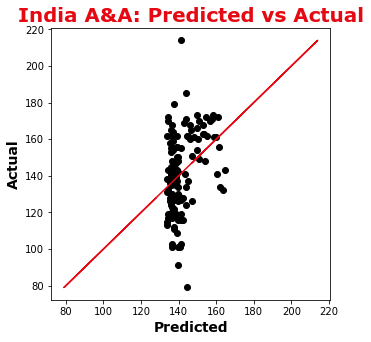

In [42]:
#questions about this one
plt.figure(figsize=(5,5))

plt.scatter(predictions, actual, c="black")
plt.plot(actual, actual,color="#E50914", )

plt.xlabel("Predicted",fontsize = 14,fontweight = "bold",fontname="Verdana")
plt.ylabel("Actual",fontsize = 14,fontweight = "bold",fontname="Verdana")
plt.title("India A&A: Predicted vs Actual", fontsize = 20, fontweight = "bold",fontname="Verdana", color = "#E50914")
plt.savefig("FIG 3.India A&A Predicted vs Actual.png")
plt.show()

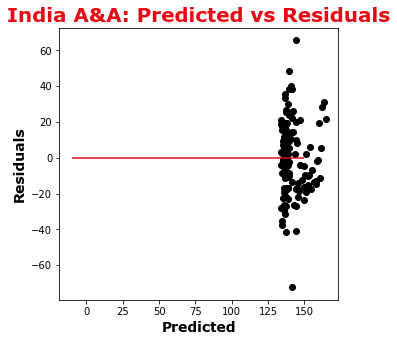

In [43]:
residuals = predictions - actual

plt.figure(figsize=(5,5))

plt.scatter(predictions, residuals,c="black")
plt.hlines(0, -10, 150,color="#E50914")

plt.xlabel("Predicted",fontsize = 14,fontweight = "bold",fontname="Verdana")
plt.ylabel("Residuals",fontsize = 14,fontweight = "bold",fontname="Verdana")
plt.title("India A&A: Predicted vs Residuals", fontsize = 20, fontweight = "bold",fontname="Verdana", color = "#E50914")
plt.savefig("FIG 4.India A&A Predicted vs Actual.png")
plt.show()